In [25]:
library(data.table)
library(magrittr)
library("GenomicRanges")
library(rtracklayer)
library(coloc)
library(dplyr)
library(Hmisc)


In [26]:
data.path <- "/lustre/groups/itg/teams/zeggini/projects/fungen-oa/analyses/pipeline_RNA_seq_analysis/eQTL/"
working_dir = "/lustre/groups/itg/teams/zeggini/projects/child_diabesity/Coloc_pipeline/Coloc"
setwd(working_dir)


In [68]:
source("coloc/Coloc_helper_functions.R")

# We now load the results from coloc.abf. If coloc.abf already found a colocalizing signal, we do not need to also use coloc.susie

In [27]:
GWAS_list_nameDescription <- list("BMI" = "GCST009004")

coloc_res <- c()

for(GWAS_ID in GWAS_list_nameDescription){
    tmp.dt <- fread(file.path(paste0(GWAS_ID, "_coloc_rda_files"), paste0("colocABF_df_results.txt")),data.table=FALSE)
    tmp.dt$GWAS_ID=GWAS_ID
    coloc_res <- rbind(coloc_res, tmp.dt)
}



In [28]:
head(coloc_res)

,cpg,cpg_pos,cpg_gene,coloc_lead_snp_chr,coloc_lead_snp_pos,coloc_lead_snp_rs,credible_set,gwas_lead_snp,gwas_lead_snp_rs,nvariants,⋯,n_gwas_variants_sign_1emins4,PP0,PP1,PP2,PP3,PP4,test_nea,test_ea,gwas_signal,GWAS_ID
,<chr>,<int>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,⋯,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<chr>,<chr>
1,cg07217846,49654365,AGBL4;RP11-141A19.1,1,49644608,rs12064172,rs12064172,1:49710264,rs12121950,117,⋯,91,3.387811e-61,7.680941e-20,4.410671e-42,1.0000000,2.695092e-20,TRUE,TRUE,rs12121950,GCST009004
2,cg08928505,62537265,INADL,1,62537265,rs12730782,rs12730782,1:62579891,rs12140153,459,⋯,237,1.572639e-178,1.744296e-18,9.015893e-161,1.0000000,1.289694e-10,TRUE,TRUE,rs12140153,GCST009004
3,cg08286288,62556579,INADL,1,62594677,rs2481665,rs2481665,1:62579891,rs12140153,459,⋯,237,2.063590e-23,1.182563e-18,1.183050e-05,0.6776376,3.223506e-01,TRUE,TRUE,rs12140153,GCST009004
4,cg01286818,62562578,INADL,1,62579891,rs12140153,"rs12140153,rs2481665",1:62579891,rs12140153,459,⋯,237,7.560331e-19,9.193279e-19,4.334316e-01,0.5270085,3.955994e-02,TRUE,TRUE,rs12140153,GCST009004
5,cg23153283,62583712,INADL,1,62579891,rs12140153,"rs12140153,rs2481665",1:62579891,rs12140153,459,⋯,237,2.491055e-19,1.478024e-18,1.428114e-01,0.8473369,9.851641e-03,TRUE,TRUE,rs12140153,GCST009004
6,cg05230511,62596969,INADL,1,62596969,rs11207905,rs11207905,1:62579891,rs12140153,459,⋯,237,3.773822e-109,1.744296e-18,2.163521e-91,1.0000000,2.319731e-19,TRUE,TRUE,rs12140153,GCST009004


In [29]:
coloc_res_sign <- coloc_res[coloc_res$PP4 >= 0.8 | (coloc_res$PP4 > 0.6 & coloc_res$PP4 < 0.8 & coloc_res$PP4/coloc_res$PP3 > 2),]

# exclude the results where we already have a colocalizing signal, then extract the other signals to colocalize with susie
coloc_res_susie <- coloc_res %>%
  dplyr::filter(!paste0(coloc_res$cpg, coloc_res$gwas_lead_snp_rs, coloc_res$GWAS_ID) %in% paste0(coloc_res_sign$cpg, coloc_res_sign$gwas_lead_snp_rs, coloc_res_sign$GWAS_ID),
                PP4 > 0.1
  )

dim(coloc_res_susie)


[1]  9 27

In [30]:
coloc_res_susie

cpg,cpg_pos,cpg_gene,coloc_lead_snp_chr,coloc_lead_snp_pos,coloc_lead_snp_rs,credible_set,gwas_lead_snp,gwas_lead_snp_rs,nvariants,⋯,n_gwas_variants_sign_1emins4,PP0,PP1,PP2,PP3,PP4,test_nea,test_ea,gwas_signal,GWAS_ID
<chr>,<int>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,⋯,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<chr>,<chr>
cg08286288,62556579,INADL,1,62594677,rs2481665,rs2481665,1:62579891,rs12140153,459,⋯,237,2.063590e-23,1.182563e-18,1.183050e-05,0.6776376,0.3223506,TRUE,TRUE,rs12140153,GCST009004
cg23535202,62604065,INADL,1,62594677,rs2481665,rs2481665,1:62579891,rs12140153,459,⋯,237,4.614893e-35,1.016034e-18,2.645705e-17,0.5820714,0.4179286,TRUE,TRUE,rs12140153,GCST009004
cg03731268,62650317,L1TD1,1,62579891,rs12140153,rs12140153,1:62579891,rs12140153,459,⋯,237,4.587387e-19,9.933056e-19,2.629936e-01,0.5692916,0.1677148,TRUE,TRUE,rs12140153,GCST009004
cg16789076,98398619,MIR137;MIR137HG;MIR2682,1,98328093,rs4523552,"rs61787782,rs12073487,rs12072739,rs4421623,rs12089031,rs10747489,rs4372296,rs4379706,rs11165920,rs75641275,rs4523551,rs4523552,rs61787785,rs11165921,rs9661794,rs6677116,rs6604093,rs17379561,rs10747491,rs10747492,rs12062845,rs61787819,rs61787820,rs7524038,rs10875112,rs4394693,rs10875113,rs1801265,rs4970722,rs12406713,rs9727548,rs7418577,rs10875118,rs9662719,rs12077442,rs4394694",1:98315893,rs12072739,176,⋯,109,4.758419e-08,1.420605e-08,5.331924e-01,0.1588743,0.3079332,TRUE,TRUE,rs12072739,GCST009004
cg09799795,75985845,ADK,10,76047464,rs12098284,"rs11000912,rs10824102,rs10824103,rs12220238,rs10824105,rs11000916,rs7083534,rs7096553,rs10824106,rs7909915,rs6480723,rs10762582,rs11000922,rs11000924,rs11000925,rs7922519,rs11000930,rs10824122,rs16931294,rs10824128,rs10824129,rs10824130,rs4320897,rs11000941,rs10824133,rs12217890,rs11000945,rs11000948,rs12098284,rs7073139,rs11000987,rs11000988,rs10824146,rs2395087,rs10824151,rs11001003,rs11001014,rs10824160,rs10824161,rs10824163,rs10824164,rs11001020,rs11001025",10:76047464,rs12098284,283,⋯,113,4.565185e-07,3.484669e-07,4.671795e-01,0.3564282,0.1763915,TRUE,TRUE,rs12098284,GCST009004
cg17129504,101124278,LINC00523,14,101144596,rs12147845,"rs12147845,rs12881629",14:101144596,rs12147845,396,⋯,66,3.788223e-06,8.803202e-06,1.941349e-01,0.4507823,0.3550703,TRUE,TRUE,rs12147845,GCST009004
cg14282221,101141909,,14,101144596,rs12147845,"rs2295659,rs745797,rs12147845",14:101144596,rs12147845,396,⋯,66,1.029534e-06,6.306114e-06,5.276051e-02,0.3225444,0.6246877,TRUE,TRUE,rs12147845,GCST009004
cg01983373,101196700,DLK1,14,101144596,rs12147845,rs12147845,14:101144596,rs12147845,396,⋯,66,3.201751e-06,1.387745e-05,1.640800e-01,0.7110520,0.1248509,TRUE,TRUE,rs12147845,GCST009004
cg08100129,101203823,RP11-566J3.2,14,101144596,rs12147845,rs12147845,14:101144596,rs12147845,396,⋯,66,5.573377e-06,5.580337e-06,2.856186e-01,0.2855465,0.4288238,TRUE,TRUE,rs12147845,GCST009004


# 9 signals had some evidence of colocalization so, for these, we want to make sure that the result is not due to multiple causal variants in the locus. For example, in one case, we have a PP3 = 0.32 and PP4=0.62. 

In [31]:
coloc_res_susie.summary <- coloc_res_susie %>%
  dplyr::select(cpg, GWAS_ID) %>%
  unique() %>%
  dplyr::count(GWAS_ID) %>%
  arrange(desc(n))


In [32]:
coloc_res_susie.summary

GWAS_ID,n
<chr>,<int>
GCST009004,9


In [33]:
dir.create(file.path("Coloc_susie"))
dir.create(file.path("Coloc_susie", "LD"))

Warning message in dir.create(file.path("Coloc_susie")):
“'Coloc_susie' already exists”
Warning message in dir.create(file.path("Coloc_susie", "LD")):
“'Coloc_susie/LD' already exists”


In [34]:
list.files("./coloc")

[1] "1_make_GO2_b38_vcf.ipynb"     "1_make_GO2_b38_vcf.R"        
 [3] "2_run_coloc_abf.ipynb"        "2_run_coloc_abf.R"           
 [5] "3_run_coloc_susie.ipynb"      "3_run_coloc_susie.R"         
 [7] "4_postprocess_coloc.R"        "Coloc_helper_functions.R"    
 [9] "Coloc_results"                "Coloc_sumstats"              
[11] "liftover_variant_annotator.R" "QTL_sumstats"                
[13] "Untitled.ipynb"               "VCF"

In [42]:
x=1
GWAS_ID <- GWAS_list_nameDescription[x]
    
coloc_res_susie_tmp <- coloc_res_susie[coloc_res_susie$GWAS_ID == GWAS_ID ,]
    
QTL_dir <- paste0("coloc/Coloc_sumstats/Coloc_mQTL_", GWAS_ID)
GWAS_dir <- paste0("coloc/Coloc_sumstats/Coloc_", GWAS_ID)
    
fnames.qtl <- list.files(QTL_dir)
fnames.qtl <- fnames.qtl[grepl(paste(coloc_res_susie_tmp$cpg, collapse="|"),fnames.qtl)]
    
fnames.gwas <- list.files(GWAS_dir)
#fnames.gwas <- fnames.gwas[grepl(tissue ,fnames.gwas)]
fnames.gwas <- fnames.gwas[grepl(paste(coloc_res_susie_tmp$cpg, collapse="|"),fnames.gwas)]

susie.res.full <- c()
count=0
    

In [44]:
fnames.qtl
fnames.gwas

[1] "cg01983373_rs12147845_mQTL_GWAS_GCST009004.txt"
[2] "cg03731268_rs12140153_mQTL_GWAS_GCST009004.txt"
[3] "cg08100129_rs12147845_mQTL_GWAS_GCST009004.txt"
[4] "cg08286288_rs12140153_mQTL_GWAS_GCST009004.txt"
[5] "cg09799795_rs12098284_mQTL_GWAS_GCST009004.txt"
[6] "cg14282221_rs12147845_mQTL_GWAS_GCST009004.txt"
[7] "cg16789076_rs12072739_mQTL_GWAS_GCST009004.txt"
[8] "cg17129504_rs12147845_mQTL_GWAS_GCST009004.txt"
[9] "cg23535202_rs12140153_mQTL_GWAS_GCST009004.txt"

[1] "cg01983373_rs12147845_mQTL_GWAS_GCST009004.txt"
[2] "cg03731268_rs12140153_mQTL_GWAS_GCST009004.txt"
[3] "cg08100129_rs12147845_mQTL_GWAS_GCST009004.txt"
[4] "cg08286288_rs12140153_mQTL_GWAS_GCST009004.txt"
[5] "cg09799795_rs12098284_mQTL_GWAS_GCST009004.txt"
[6] "cg14282221_rs12147845_mQTL_GWAS_GCST009004.txt"
[7] "cg16789076_rs12072739_mQTL_GWAS_GCST009004.txt"
[8] "cg17129504_rs12147845_mQTL_GWAS_GCST009004.txt"
[9] "cg23535202_rs12140153_mQTL_GWAS_GCST009004.txt"

In [50]:
i=1

print(paste0("Processing CpG ",i, " of ", length(fnames.gwas), " for GWAS ", GWAS_list_nameDescription[[x]]))
      
QTL <- fread(file.path(QTL_dir, fnames.qtl[i]), data.table=TRUE)
GWAS <- fread(file.path(GWAS_dir, fnames.gwas[i]), data.table=TRUE)


[1] "Processing CpG 1 of 9 for GWAS GCST009004"


In [51]:
head(QTL)
head(GWAS)

SNP,chr,pos,A1,A2,A1_freq,beta,se,p,n
<chr>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
rs7494274,14,101044690,G,A,0.411458,-0.0308170,0.0509259,0.545624,288
rs7493101,14,101046043,A,G,0.411458,-0.0288109,0.0509117,0.571956,288
rs60477458,14,101046416,T,C,0.144097,0.1142480,0.0728992,0.118296,288
rs7147982,14,101046649,T,C,0.263889,-0.0976536,0.0546653,0.075215,288
rs3994913,14,101047316,T,C,0.144097,0.1142480,0.0728992,0.118296,288
rs10873519,14,101048397,T,C,0.144097,-0.1142480,0.0728992,0.118296,288


SNP,chr,pos,A1,A2,A1_freq,beta,se,p,n
<chr>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
rs7494274,14,101044690,G,A,0.5918,1e-04,0.0020,0.9537000,806834
rs7493101,14,101046043,A,G,0.4296,6e-04,0.0017,0.7117001,806834
rs60477458,14,101046416,T,C,0.1269,5e-04,0.0029,0.8555000,806834
rs7147982,14,101046649,T,C,0.2863,6e-04,0.0021,0.7738005,806834
rs3994913,14,101047316,T,C,0.1267,6e-04,0.0029,0.8456001,806834
rs10873519,14,101048397,T,C,0.8731,-9e-04,0.0029,0.7531006,806834


In [ ]:
# code from Ana specific to GO2 
#      print("Annotating QTL with chrom and pos")
#      QTL[, ID:=SNP]
#      QTL[, c("chr", "pos", "SNP"):=tstrsplit(ID, "_")[c(1,2,5)]]
#      QTL[, chr:=as.integer(sub("chr", "", chr))]
#      QTL[, pos:=as.integer(pos)]
#     QTL[, cptid:=paste(paste(chr, pos, sep=":"), A1, A2, sep="_")]
#     QTL[, cptid_rev:=paste(paste(chr, pos, sep=":"), A2, A1, sep="_")]
#      
#      print("Annotating GWAS with rsID from QTL")
#      GWAS[, cptid:=SNP]
#      GWAS[, SNP:=NULL]
#      GWAS <- rbind(merge(GWAS, QTL[, .(SNP, cptid)], by="cptid"), merge(GWAS, QTL[, .(SNP, cptid=cptid_rev)], by="cptid"))
#      setkey(QTL, SNP)
#      setkey(GWAS, SNP)
      
      #######################
#      positions = QTL$pos
#      chr = unique(QTL$chr)
#      susie.res <- data.frame()


In [54]:
head(QTL)

SNP,chr,pos,A1,A2,A1_freq,beta,se,p,n
<chr>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
rs7494274,14,101044690,G,A,0.411458,-0.0308170,0.0509259,0.545624,288
rs7493101,14,101046043,A,G,0.411458,-0.0288109,0.0509117,0.571956,288
rs60477458,14,101046416,T,C,0.144097,0.1142480,0.0728992,0.118296,288
rs7147982,14,101046649,T,C,0.263889,-0.0976536,0.0546653,0.075215,288
rs3994913,14,101047316,T,C,0.144097,0.1142480,0.0728992,0.118296,288
rs10873519,14,101048397,T,C,0.144097,-0.1142480,0.0728992,0.118296,288


In [66]:
list.files("Coloc_susie/LD")

[1] "cg01983373_rs12147845.LD.log"      "cg01983373_rs12147845.SNP.extract"
[3] "cg01983373_rs12147845.SNP.REF.txt"

In [67]:
bfile=paste0("/lustre/groups/itg/teams/zeggini/projects/child_diabesity/analysis/methyl/matrixeQTL/Results/plinkGenotypeFiles/chr",chr)
system(paste0('echo /lustre/groups/itg/shared/software/bin/plink2 --bfile ', bfile, ' --const-fid --extract Coloc_susie/LD/',gsub("_mQTL_GWAS.*","", fnames.gwas[i]),'.SNP.extract --threads 1 --update-ref-allele Coloc_susie/LD/',gsub("_mQTL_GWAS.*","", fnames.gwas[i]),'.SNP.REF.txt 2 1 --r square --out Coloc_susie/LD/',gsub("_mQTL_GWAS.*","", fnames.gwas[i]),'.LD --make-just-bim'))




In [ ]:
/lustre/groups/itg/shared/software/bin/plink2 --bfile /lustre/groups/itg/teams/zeggini/projects/child_diabesity/analysis/methyl/matrixeQTL/Results/plinkGenotypeFiles/chr14  --const-fid --extract Coloc_susie/LD/cg01983373_rs12147845.SNP.extract --threads 1 --update-ref-allele Coloc_susie/LD/cg01983373_rs12147845.SNP.REF.txt  2 1 --r square --out Coloc_susie/LD/test.LD --make-just-bim        


In [119]:
for(x in seq(1:length(GWAS_list_nameDescription))) {
    
    GWAS_ID <- GWAS_list_nameDescription[x]
    
    coloc_res_susie_tmp <- coloc_res_susie[coloc_res_susie$GWAS_ID == GWAS_ID ,]
        
    QTL_dir <- paste0("coloc/Coloc_sumstats/Coloc_mQTL_", GWAS_ID)
    GWAS_dir <- paste0("coloc/Coloc_sumstats/Coloc_", GWAS_ID)
        
    fnames.qtl <- list.files(QTL_dir)
    fnames.qtl <- fnames.qtl[grepl(paste(coloc_res_susie_tmp$cpg, collapse="|"),fnames.qtl)]
        
    fnames.gwas <- list.files(GWAS_dir)
    #fnames.gwas <- fnames.gwas[grepl(tissue ,fnames.gwas)]
    fnames.gwas <- fnames.gwas[grepl(paste(coloc_res_susie_tmp$cpg, collapse="|"),fnames.gwas)]
    
    susie.res.full <- c()
    count=0
    
    
    tmp.res <- lapply(1:length(fnames.gwas), FUN = function(i){
      
          print(paste0("Processing CpG ",i, " of ", length(fnames.gwas), " for GWAS ", GWAS_list_nameDescription[[x]]))
      
        QTL <- fread(file.path(QTL_dir, fnames.qtl[i]), data.table=TRUE)
        GWAS <- fread(file.path(GWAS_dir, fnames.gwas[i]), data.table=TRUE)

    # code from Ana specific to GO2 
    #      print("Annotating QTL with chrom and pos")
    #      QTL[, ID:=SNP]
    #      QTL[, c("chr", "pos", "SNP"):=tstrsplit(ID, "_")[c(1,2,5)]]
    #      QTL[, chr:=as.integer(sub("chr", "", chr))]
    #      QTL[, pos:=as.integer(pos)]
    #     QTL[, cptid:=paste(paste(chr, pos, sep=":"), A1, A2, sep="_")]
    #     QTL[, cptid_rev:=paste(paste(chr, pos, sep=":"), A2, A1, sep="_")]
    #      
    #      print("Annotating GWAS with rsID from QTL")
    #      GWAS[, cptid:=SNP]
    #      GWAS[, SNP:=NULL]
    #      GWAS <- rbind(merge(GWAS, QTL[, .(SNP, cptid)], by="cptid"), merge(GWAS, QTL[, .(SNP, cptid=cptid_rev)], by="cptid"))
    #      setkey(QTL, SNP)
    #      setkey(GWAS, SNP)
          
          #######################
          positions = QTL$pos
          chr = unique(QTL$chr)
          susie.res <- data.frame()
      
      MHCregion=data.frame(chr="6", start=28477797, end=33448354)
      # Only run if not MHC region
      if(!(chr == MHCregion$chr & (sum(positions > MHCregion$start) > 0 & sum(positions < MHCregion$end) > 0))){
        
            print("Loading LD matrix")
            # bfile is the path and prefix of genotype data in plink format    
        #    if(tissue=="low_grade_cartilage") ld.file <- paste0("/lustre/groups/itg/teams/zeggini/projects/fungen-oa/analyses/pipeline_RNA_seq_analysis/eQTL/", tissue, "/CleanGenotypes/P21083A_P21083B.indel_snp.recalibrated.autosomal.hardfiltered.samqc.", ab, "_samples.MAF005CR999.biall_rename")
        #    else ld.file <- paste0("/lustre/groups/itg/teams/zeggini/projects/fungen-oa/analyses/pipeline_RNA_seq_analysis/eQTL/", tissue, "/CleanGenotypes/P21083A_P21083B.indel_snp.recalibrated.autosomal.hardfiltered.samqc.", ab, "_samples.MAF005CR99.biall_rename")
        
            ld_subset.QTL <- ld_matrix_local_MT(QTL, chr, fnames.qtl[i], bfile=paste0("/lustre/groups/itg/teams/zeggini/projects/child_diabesity/analysis/methyl/matrixeQTL/Results/plinkGenotypeFiles/chr",chr))
            # ld_subset.GWAS <- ld_matrix_local_GO(GWAS, chr, fnames.gwas[i], bfile=paste0("/lustre/groups/itg/shared/referenceData/ukbiobank/chip/bgen2plink/CM/chr", chr))
            # 
           ld_subset.GWAS <- ld_matrix_local_MT(GWAS, chr, fnames.gwas[i][i], bfile=paste0("/lustre/groups/itg/teams/zeggini/projects/child_diabesity/analysis/methyl/matrixeQTL/Results/plinkGenotypeFiles/chr",chr))
 
         # Rename row and column ld_subset.QTL with rsid
       #  colnames(ld_subset.QTL) <- QTL$SNP[match(colnames(ld_subset.QTL), QTL$SNP)]
       #  rownames(ld_subset.QTL) <- QTL$SNP[match(rownames(ld_subset.QTL), QTL$SNP)]
        
        # QTL
        D1 = list(N = QTL$n[1], 
                  MAF = QTL$A1_freq[QTL$SNP %in% rownames(ld_subset.QTL)], 
                  beta = QTL$beta[QTL$SNP %in% rownames(ld_subset.QTL)], 
                  varbeta = (QTL$se[QTL$SNP %in% rownames(ld_subset.QTL)])^2, 
                  type = "quant", 
                  snp = QTL$SNP[QTL$SNP %in% rownames(ld_subset.QTL)], 
                  pvalue =  QTL$p[QTL$SNP %in% rownames(ld_subset.QTL)],
                  stringsAsFactors = F,
                  position= QTL$pos[QTL$SNP %in% rownames(ld_subset.QTL)],
                  LD = ld_subset.QTL
        )
        D1$MAF = ifelse(D1$MAF <= 0.5, D1$MAF, 1 - D1$MAF)
        
        # GWAS
        GWAS <- GWAS[!is.na(GWAS$A1_freq),]
        GWAS <- unique(GWAS)
        D2 = list(N = GWAS$n[1], 
                  MAF = GWAS$A1_freq[GWAS$SNP %in% rownames(ld_subset.GWAS)], 
                  beta = GWAS$beta[GWAS$SNP %in% rownames(ld_subset.GWAS)], 
                  varbeta = (GWAS$se[GWAS$SNP %in% rownames(ld_subset.GWAS)])^2, 
                  type = "quant", 
                  snp = GWAS$SNP[GWAS$SNP %in% rownames(ld_subset.GWAS)], 
                  stringsAsFactors = F,
                  position= GWAS$p[GWAS$SNP %in% rownames(ld_subset.GWAS)],
                  LD = ld_subset.GWAS
        )
        D2$MAF = ifelse(D2$MAF <= 0.5, D2$MAF, 1 - D2$MAF)
        # Change type and add ratio of cases if cc
        if("s" %in% colnames(GWAS)){
          D2$type = "cc"
          D2$s <- GWAS$s[1]
          
        }
        
        susie.res <- data.frame()
        # First, try to finemap with up to 5 credible sets.
        # If this fails, finemap with 1 credible set, which is equivalent to what coloc does
        print(paste0("Running coloc.susie"))
        coverage = 0.95
        eqtl.s = tryCatch(runsusie(D1, L=5, coverage=coverage, repeat_until_convergence = FALSE), error = function(e){print("QTL did not converge")})
        gwas.s = tryCatch(runsusie(D2, L=5, coverage=coverage, repeat_until_convergence = FALSE), error = function(e){print("GWAS did not converge")})
        
        
        if(!class(eqtl.s) == "susie"){
          eqtl.s = tryCatch(runsusie(D1, L=1, coverage=coverage, repeat_until_convergence = FALSE), error = function(e){print("QTL did not converge")})
        } else if(is.null(eqtl.s$sets$cs)){
          eqtl.s = tryCatch(runsusie(D1, L=1, coverage=coverage, repeat_until_convergence = FALSE), error = function(e){print("QTL did not converge")})
        }
        
        if(!class(gwas.s) == "susie"){
          gwas.s = tryCatch(runsusie(D2, L=1, coverage=coverage, repeat_until_convergence = FALSE), error = function(e){print("GWAS did not converge")})
        } else if(is.null(gwas.s$sets$cs)){
          gwas.s = tryCatch(runsusie(D2, L=1, coverage=coverage, repeat_until_convergence = FALSE), error = function(e){print("GWAS did not converge")})
        }

        while(is.null(gwas.s$sets$cs) | coverage >= 0.4){
            coverage = coverage - 0.1
            print(coverage)
            eqtl.s = tryCatch(runsusie(D1, L=1, coverage=coverage, repeat_until_convergence = FALSE), error = function(e){print("QTL did not converge")})
        }
  
        
        if(class(eqtl.s) == "susie" & class(gwas.s) == "susie"){
          if(!is.null(eqtl.s$sets$cs) & !is.null(gwas.s$sets$cs)){
            print("Running coloc.susie")
            susie.res=coloc.susie(gwas.s, eqtl.s, p12=1e-05)
            susie.res$summary$Dataset <- fnames.gwas[i]
            susie.res$summary$H4_H3_ratio <- susie.res$summary[,8]/susie.res$summary[,7]
            susie.res$summary$Colocalise <- ifelse(susie.res$summary$PP.H4.abf > 0.8 | (susie.res$summary$PP.H4.abf > 0.6 & susie.res$summary$PP.H4.abf < 0.8 & susie.res$summary$H4_H3_ratio > 2), TRUE, FALSE)
            print(susie.res$summary)
            susie.res <- as.data.frame(susie.res$summary)
          } else{
            susie.res=coloc.susie(gwas.s, eqtl.s, p12=1e-05)
            susie.res$Colocalise <- NA
          }
        } 
        
        return(data.table::as.data.table(susie.res))
        count=count+1
      }
    }
    )
    susie.res.full <- rbindlist(tmp.res, fill=TRUE)
    fwrite(susie.res.full, file= file.path("Coloc_susie", paste0("ColocSusie_results_",GWAS_ID, ".txt")), sep="\t")
  }

[1] "Processing CpG 1 of 9 for GWAS GCST009004"
[1] "Loading LD matrix"
[1] "Running coloc.susie"


running max iterations: 100

	converged: TRUE

running max iterations: 100

	converged: TRUE

running max iterations: 100

	converged: TRUE



[1] 0.85


running max iterations: 100

	converged: TRUE



[1] 0.75


running max iterations: 100

	converged: TRUE



[1] 0.65


running max iterations: 100

	converged: TRUE



[1] 0.55


running max iterations: 100

	converged: TRUE



[1] 0.45


running max iterations: 100

	converged: TRUE



[1] 0.35


running max iterations: 100

	converged: TRUE



[1] "Running coloc.susie"
   nsnps       hit1      hit2    PP.H0.abf PP.H1.abf    PP.H2.abf PP.H3.abf
   <int>     <char>    <char>        <num>     <num>        <num>     <num>
1:   383  rs1467537 rs3783350 3.774566e-02 0.1871969 1.115904e-01 0.5533146
2:   383 rs12147845 rs3783350 6.538859e-08 0.2127791 1.933134e-07 0.6288971
   PP.H4.abf  idx1  idx2                                        Dataset
       <num> <int> <int>                                         <char>
1: 0.1101524     3     1 cg01983373_rs12147845_mQTL_GWAS_GCST009004.txt
2: 0.1583236     1     1 cg01983373_rs12147845_mQTL_GWAS_GCST009004.txt
   H4_H3_ratio Colocalise
         <num>     <lgcl>
1:   0.1990774      FALSE
2:   0.2517480      FALSE
[1] "Processing CpG 2 of 9 for GWAS GCST009004"
[1] "Loading LD matrix"
[1] "Running coloc.susie"


Warning message in check_dataset(d, suffix, req = c("beta", "varbeta", "LD", "snp", :
“minimum p value is: 6.0472e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check you supplied var(beta) and not sd(beta) for the varbeta argument. If that's not the explanation, please check the 02_data vignette.”
running max iterations: 100

	converged: TRUE

running max iterations: 100

	converged: TRUE

Warning message in check_dataset(d, suffix, req = c("beta", "varbeta", "LD", "snp", :
“minimum p value is: 6.0472e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check you supplied var(beta) and not sd(beta) for the varbeta argument. If that's not the explanation, please check the 02_data vignette.”
running max iterations: 100

	converged: TRUE



[1] 0.85


Warning message in check_dataset(d, suffix, req = c("beta", "varbeta", "LD", "snp", :
“minimum p value is: 6.0472e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check you supplied var(beta) and not sd(beta) for the varbeta argument. If that's not the explanation, please check the 02_data vignette.”
running max iterations: 100

	converged: TRUE



[1] 0.75


Warning message in check_dataset(d, suffix, req = c("beta", "varbeta", "LD", "snp", :
“minimum p value is: 6.0472e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check you supplied var(beta) and not sd(beta) for the varbeta argument. If that's not the explanation, please check the 02_data vignette.”
running max iterations: 100

	converged: TRUE



[1] 0.65


Warning message in check_dataset(d, suffix, req = c("beta", "varbeta", "LD", "snp", :
“minimum p value is: 6.0472e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check you supplied var(beta) and not sd(beta) for the varbeta argument. If that's not the explanation, please check the 02_data vignette.”
running max iterations: 100

	converged: TRUE



[1] 0.55


Warning message in check_dataset(d, suffix, req = c("beta", "varbeta", "LD", "snp", :
“minimum p value is: 6.0472e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check you supplied var(beta) and not sd(beta) for the varbeta argument. If that's not the explanation, please check the 02_data vignette.”
running max iterations: 100

	converged: TRUE



[1] 0.45


Warning message in check_dataset(d, suffix, req = c("beta", "varbeta", "LD", "snp", :
“minimum p value is: 6.0472e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check you supplied var(beta) and not sd(beta) for the varbeta argument. If that's not the explanation, please check the 02_data vignette.”
running max iterations: 100

	converged: TRUE



[1] 0.35


Warning message in check_dataset(d, suffix, req = c("beta", "varbeta", "LD", "snp", :
“minimum p value is: 6.0472e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check you supplied var(beta) and not sd(beta) for the varbeta argument. If that's not the explanation, please check the 02_data vignette.”
running max iterations: 100

	converged: TRUE



[1] "Running coloc.susie"
   nsnps       hit1      hit2    PP.H0.abf PP.H1.abf    PP.H2.abf PP.H3.abf
   <int>     <char>    <char>        <num>     <num>        <num>     <num>
1:   444 rs12140153 rs2366313 9.091932e-21 0.2478723 2.082154e-20 0.5674707
2:   444 rs41313250 rs2366313 1.470616e-03 0.2772725 3.367877e-03 0.6349022
    PP.H4.abf  idx1  idx2                                        Dataset
        <num> <int> <int>                                         <char>
1: 0.18465704     1     1 cg03731268_rs12140153_mQTL_GWAS_GCST009004.txt
2: 0.08298683     2     1 cg03731268_rs12140153_mQTL_GWAS_GCST009004.txt
   H4_H3_ratio Colocalise
         <num>     <lgcl>
1:   0.3254037      FALSE
2:   0.1307081      FALSE
[1] "Processing CpG 3 of 9 for GWAS GCST009004"
[1] "Loading LD matrix"
[1] "Running coloc.susie"


Warning message in check_dataset(d, suffix, req = c("beta", "varbeta", "LD", "snp", :
“minimum p value is: 9.4615e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check you supplied var(beta) and not sd(beta) for the varbeta argument. If that's not the explanation, please check the 02_data vignette.”
running max iterations: 100

	converged: TRUE

running max iterations: 100

	converged: TRUE

Warning message in check_dataset(d, suffix, req = c("beta", "varbeta", "LD", "snp", :
“minimum p value is: 9.4615e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check you supplied var(beta) and not sd(beta) for the varbeta argument. If that's not the explanation, please check the 02_data vignette.”
running max iterations: 100

	converged: TRUE



[1] 0.85


Warning message in check_dataset(d, suffix, req = c("beta", "varbeta", "LD", "snp", :
“minimum p value is: 9.4615e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check you supplied var(beta) and not sd(beta) for the varbeta argument. If that's not the explanation, please check the 02_data vignette.”
running max iterations: 100

	converged: TRUE



[1] 0.75


Warning message in check_dataset(d, suffix, req = c("beta", "varbeta", "LD", "snp", :
“minimum p value is: 9.4615e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check you supplied var(beta) and not sd(beta) for the varbeta argument. If that's not the explanation, please check the 02_data vignette.”
running max iterations: 100

	converged: TRUE



[1] 0.65


Warning message in check_dataset(d, suffix, req = c("beta", "varbeta", "LD", "snp", :
“minimum p value is: 9.4615e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check you supplied var(beta) and not sd(beta) for the varbeta argument. If that's not the explanation, please check the 02_data vignette.”
running max iterations: 100

	converged: TRUE



[1] 0.55


Warning message in check_dataset(d, suffix, req = c("beta", "varbeta", "LD", "snp", :
“minimum p value is: 9.4615e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check you supplied var(beta) and not sd(beta) for the varbeta argument. If that's not the explanation, please check the 02_data vignette.”
running max iterations: 100

	converged: TRUE



[1] 0.45


Warning message in check_dataset(d, suffix, req = c("beta", "varbeta", "LD", "snp", :
“minimum p value is: 9.4615e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check you supplied var(beta) and not sd(beta) for the varbeta argument. If that's not the explanation, please check the 02_data vignette.”
running max iterations: 100

	converged: TRUE



[1] 0.35


Warning message in check_dataset(d, suffix, req = c("beta", "varbeta", "LD", "snp", :
“minimum p value is: 9.4615e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check you supplied var(beta) and not sd(beta) for the varbeta argument. If that's not the explanation, please check the 02_data vignette.”
running max iterations: 100

	converged: TRUE



[1] "Running coloc.susie"
   nsnps       hit1       hit2    PP.H0.abf  PP.H1.abf    PP.H2.abf  PP.H3.abf
   <int>     <char>     <char>        <num>      <num>        <num>      <num>
1:   383  rs1467537 rs79095882 1.707141e-02 0.08466442 1.898499e-02 0.09336875
2:   383 rs12147845 rs79095882 8.958093e-08 0.29150262 9.962227e-08 0.32379315
   PP.H4.abf  idx1  idx2                                        Dataset
       <num> <int> <int>                                         <char>
1: 0.7859104     3     1 cg08100129_rs12147845_mQTL_GWAS_GCST009004.txt
2: 0.3847040     1     1 cg08100129_rs12147845_mQTL_GWAS_GCST009004.txt
   H4_H3_ratio Colocalise
         <num>     <lgcl>
1:    8.417275       TRUE
2:    1.188117      FALSE
[1] "Processing CpG 4 of 9 for GWAS GCST009004"
[1] "Loading LD matrix"
[1] "Running coloc.susie"


running max iterations: 100

	converged: TRUE

running max iterations: 100

	converged: TRUE



[1] 0.85


running max iterations: 100

	converged: TRUE



[1] 0.75


running max iterations: 100

	converged: TRUE



[1] 0.65


running max iterations: 100

	converged: TRUE



[1] 0.55


running max iterations: 100

	converged: TRUE



[1] 0.45


running max iterations: 100

	converged: TRUE



[1] 0.35


running max iterations: 100

	converged: TRUE



[1] "Running coloc.susie"
   nsnps       hit1      hit2    PP.H0.abf    PP.H1.abf    PP.H2.abf PP.H3.abf
   <int>     <char>    <char>        <num>        <num>        <num>     <num>
1:   444 rs12140153 rs6682776 3.953942e-24 0.0001077958 3.667588e-20 0.9998902
2:   444 rs41313250 rs6682776 5.516568e-07 0.0001040103 5.117046e-03 0.9647464
      PP.H4.abf  idx1  idx2                                        Dataset
          <num> <int> <int>                                         <char>
1: 1.988953e-06     1     1 cg08286288_rs12140153_mQTL_GWAS_GCST009004.txt
2: 3.003201e-02     2     1 cg08286288_rs12140153_mQTL_GWAS_GCST009004.txt
    H4_H3_ratio Colocalise
          <num>     <lgcl>
1: 1.989172e-06      FALSE
2: 3.112944e-02      FALSE
[1] "Processing CpG 5 of 9 for GWAS GCST009004"
[1] "Loading LD matrix"
[1] "Running coloc.susie"


Warning message in check_dataset(d, suffix, req = c("beta", "varbeta", "LD", "snp", :
“minimum p value is: 4.3771e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check you supplied var(beta) and not sd(beta) for the varbeta argument. If that's not the explanation, please check the 02_data vignette.”
running max iterations: 100

	converged: TRUE

running max iterations: 100

	converged: TRUE

Warning message in check_dataset(d, suffix, req = c("beta", "varbeta", "LD", "snp", :
“minimum p value is: 4.3771e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check you supplied var(beta) and not sd(beta) for the varbeta argument. If that's not the explanation, please check the 02_data vignette.”
running max iterations: 100

	converged: TRUE



[1] 0.85


Warning message in check_dataset(d, suffix, req = c("beta", "varbeta", "LD", "snp", :
“minimum p value is: 4.3771e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check you supplied var(beta) and not sd(beta) for the varbeta argument. If that's not the explanation, please check the 02_data vignette.”
running max iterations: 100

	converged: TRUE



[1] 0.75


Warning message in check_dataset(d, suffix, req = c("beta", "varbeta", "LD", "snp", :
“minimum p value is: 4.3771e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check you supplied var(beta) and not sd(beta) for the varbeta argument. If that's not the explanation, please check the 02_data vignette.”
running max iterations: 100

	converged: TRUE



[1] 0.65


Warning message in check_dataset(d, suffix, req = c("beta", "varbeta", "LD", "snp", :
“minimum p value is: 4.3771e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check you supplied var(beta) and not sd(beta) for the varbeta argument. If that's not the explanation, please check the 02_data vignette.”
running max iterations: 100

	converged: TRUE



[1] 0.55


Warning message in check_dataset(d, suffix, req = c("beta", "varbeta", "LD", "snp", :
“minimum p value is: 4.3771e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check you supplied var(beta) and not sd(beta) for the varbeta argument. If that's not the explanation, please check the 02_data vignette.”
running max iterations: 100

	converged: TRUE



[1] 0.45


Warning message in check_dataset(d, suffix, req = c("beta", "varbeta", "LD", "snp", :
“minimum p value is: 4.3771e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check you supplied var(beta) and not sd(beta) for the varbeta argument. If that's not the explanation, please check the 02_data vignette.”
running max iterations: 100

	converged: TRUE



[1] 0.35


Warning message in check_dataset(d, suffix, req = c("beta", "varbeta", "LD", "snp", :
“minimum p value is: 4.3771e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check you supplied var(beta) and not sd(beta) for the varbeta argument. If that's not the explanation, please check the 02_data vignette.”
running max iterations: 100

	converged: TRUE



[1] "Running coloc.susie"
   nsnps       hit1       hit2    PP.H0.abf PP.H1.abf    PP.H2.abf PP.H3.abf
   <int>     <char>     <char>        <num>     <num>        <num>     <num>
1:   276 rs11000980 rs10762588 0.0165330480 0.5345695 0.0116845982 0.3777432
2:   276 rs11000941 rs10762588 0.0003758027 0.4469827 0.0002655955 0.3156647
    PP.H4.abf  idx1  idx2                                        Dataset
        <num> <int> <int>                                         <char>
1: 0.05946961     2     1 cg09799795_rs12098284_mQTL_GWAS_GCST009004.txt
2: 0.23671118     1     1 cg09799795_rs12098284_mQTL_GWAS_GCST009004.txt
   H4_H3_ratio Colocalise
         <num>     <lgcl>
1:   0.1574340      FALSE
2:   0.7498817      FALSE
[1] "Processing CpG 6 of 9 for GWAS GCST009004"
[1] "Loading LD matrix"
[1] "Running coloc.susie"


running max iterations: 100

	converged: TRUE

running max iterations: 100

	converged: TRUE

running max iterations: 100

	converged: TRUE



[1] 0.85


running max iterations: 100

	converged: TRUE



[1] 0.75


running max iterations: 100

	converged: TRUE



[1] 0.65


running max iterations: 100

	converged: TRUE



[1] 0.55


running max iterations: 100

	converged: TRUE



[1] 0.45


running max iterations: 100

	converged: TRUE



[1] 0.35


running max iterations: 100

	converged: TRUE



[1] "Running coloc.susie"
   nsnps       hit1     hit2    PP.H0.abf   PP.H1.abf    PP.H2.abf PP.H3.abf
   <int>     <char>   <char>        <num>       <num>        <num>     <num>
1:   383  rs1467537 rs745797 4.584287e-03 0.022735438 6.086131e-02 0.3012267
2:   383 rs12147845 rs745797 2.037086e-09 0.006628819 2.704449e-08 0.0870984
   PP.H4.abf  idx1  idx2                                        Dataset
       <num> <int> <int>                                         <char>
1: 0.6105923     3     1 cg14282221_rs12147845_mQTL_GWAS_GCST009004.txt
2: 0.9062728     1     1 cg14282221_rs12147845_mQTL_GWAS_GCST009004.txt
   H4_H3_ratio Colocalise
         <num>     <lgcl>
1:    2.027019       TRUE
2:   10.405160       TRUE
[1] "Processing CpG 7 of 9 for GWAS GCST009004"
[1] "Loading LD matrix"
[1] "Running coloc.susie"


Warning message in check_dataset(d, suffix, req = c("beta", "varbeta", "LD", "snp", :
“minimum p value is: 1.3559e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check you supplied var(beta) and not sd(beta) for the varbeta argument. If that's not the explanation, please check the 02_data vignette.”
running max iterations: 100

	converged: TRUE

running max iterations: 100

	converged: TRUE

Warning message in check_dataset(d, suffix, req = c("beta", "varbeta", "LD", "snp", :
“minimum p value is: 1.3559e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check you supplied var(beta) and not sd(beta) for the varbeta argument. If that's not the explanation, please check the 02_data vignette.”
running max iterations: 100

	converged: TRUE



[1] 0.85


Warning message in check_dataset(d, suffix, req = c("beta", "varbeta", "LD", "snp", :
“minimum p value is: 1.3559e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check you supplied var(beta) and not sd(beta) for the varbeta argument. If that's not the explanation, please check the 02_data vignette.”
running max iterations: 100

	converged: TRUE



[1] 0.75


Warning message in check_dataset(d, suffix, req = c("beta", "varbeta", "LD", "snp", :
“minimum p value is: 1.3559e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check you supplied var(beta) and not sd(beta) for the varbeta argument. If that's not the explanation, please check the 02_data vignette.”
running max iterations: 100

	converged: TRUE



[1] 0.65


Warning message in check_dataset(d, suffix, req = c("beta", "varbeta", "LD", "snp", :
“minimum p value is: 1.3559e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check you supplied var(beta) and not sd(beta) for the varbeta argument. If that's not the explanation, please check the 02_data vignette.”
running max iterations: 100

	converged: TRUE



[1] 0.55


Warning message in check_dataset(d, suffix, req = c("beta", "varbeta", "LD", "snp", :
“minimum p value is: 1.3559e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check you supplied var(beta) and not sd(beta) for the varbeta argument. If that's not the explanation, please check the 02_data vignette.”
running max iterations: 100

	converged: TRUE



[1] 0.45


Warning message in check_dataset(d, suffix, req = c("beta", "varbeta", "LD", "snp", :
“minimum p value is: 1.3559e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check you supplied var(beta) and not sd(beta) for the varbeta argument. If that's not the explanation, please check the 02_data vignette.”
running max iterations: 100

	converged: TRUE



[1] 0.35


Warning message in check_dataset(d, suffix, req = c("beta", "varbeta", "LD", "snp", :
“minimum p value is: 1.3559e-05
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check you supplied var(beta) and not sd(beta) for the varbeta argument. If that's not the explanation, please check the 02_data vignette.”
running max iterations: 100

	converged: TRUE



[1] "Running coloc.susie"
   nsnps      hit1      hit2    PP.H0.abf PP.H1.abf    PP.H2.abf PP.H3.abf
   <int>    <char>    <char>        <num>     <num>        <num>     <num>
1:   173 rs6696127 rs4271249 9.262636e-04 0.6470466 2.834608e-04 0.1978593
2:   173 rs4523552 rs4271249 5.861320e-18 0.5173288 1.793717e-18 0.1579914
   PP.H4.abf  idx1  idx2                                        Dataset
       <num> <int> <int>                                         <char>
1: 0.1538844     2     1 cg16789076_rs12072739_mQTL_GWAS_GCST009004.txt
2: 0.3246798     1     1 cg16789076_rs12072739_mQTL_GWAS_GCST009004.txt
   H4_H3_ratio Colocalise
         <num>     <lgcl>
1:   0.7777469      FALSE
2:   2.0550470      FALSE
[1] "Processing CpG 8 of 9 for GWAS GCST009004"
[1] "Loading LD matrix"
[1] "Running coloc.susie"


Warning message in check_dataset(d, suffix, req = c("beta", "varbeta", "LD", "snp", :
“minimum p value is: 3.2592e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check you supplied var(beta) and not sd(beta) for the varbeta argument. If that's not the explanation, please check the 02_data vignette.”
running max iterations: 100

	converged: TRUE

running max iterations: 100

	converged: TRUE

Warning message in check_dataset(d, suffix, req = c("beta", "varbeta", "LD", "snp", :
“minimum p value is: 3.2592e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check you supplied var(beta) and not sd(beta) for the varbeta argument. If that's not the explanation, please check the 02_data vignette.”
running max iterations: 100

	converged: TRUE



[1] 0.85


Warning message in check_dataset(d, suffix, req = c("beta", "varbeta", "LD", "snp", :
“minimum p value is: 3.2592e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check you supplied var(beta) and not sd(beta) for the varbeta argument. If that's not the explanation, please check the 02_data vignette.”
running max iterations: 100

	converged: TRUE



[1] 0.75


Warning message in check_dataset(d, suffix, req = c("beta", "varbeta", "LD", "snp", :
“minimum p value is: 3.2592e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check you supplied var(beta) and not sd(beta) for the varbeta argument. If that's not the explanation, please check the 02_data vignette.”
running max iterations: 100

	converged: TRUE



[1] 0.65


Warning message in check_dataset(d, suffix, req = c("beta", "varbeta", "LD", "snp", :
“minimum p value is: 3.2592e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check you supplied var(beta) and not sd(beta) for the varbeta argument. If that's not the explanation, please check the 02_data vignette.”
running max iterations: 100

	converged: TRUE



[1] 0.55


Warning message in check_dataset(d, suffix, req = c("beta", "varbeta", "LD", "snp", :
“minimum p value is: 3.2592e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check you supplied var(beta) and not sd(beta) for the varbeta argument. If that's not the explanation, please check the 02_data vignette.”
running max iterations: 100

	converged: TRUE



[1] 0.45


Warning message in check_dataset(d, suffix, req = c("beta", "varbeta", "LD", "snp", :
“minimum p value is: 3.2592e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check you supplied var(beta) and not sd(beta) for the varbeta argument. If that's not the explanation, please check the 02_data vignette.”
running max iterations: 100

	converged: TRUE



[1] 0.35


Warning message in check_dataset(d, suffix, req = c("beta", "varbeta", "LD", "snp", :
“minimum p value is: 3.2592e-06
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check you supplied var(beta) and not sd(beta) for the varbeta argument. If that's not the explanation, please check the 02_data vignette.”
running max iterations: 100

	converged: TRUE



[1] "Running coloc.susie"
   nsnps       hit1      hit2    PP.H0.abf PP.H1.abf    PP.H2.abf PP.H3.abf
   <int>     <char>    <char>        <num>     <num>        <num>     <num>
1:   383  rs1467537 rs4905989 6.037518e-02 0.2994263 1.026830e-01 0.5092208
2:   383 rs12147845 rs4905989 6.670735e-08 0.2170704 1.134525e-07 0.3687681
    PP.H4.abf  idx1  idx2                                        Dataset
        <num> <int> <int>                                         <char>
1: 0.02829469     3     1 cg17129504_rs12147845_mQTL_GWAS_GCST009004.txt
2: 0.41416130     1     1 cg17129504_rs12147845_mQTL_GWAS_GCST009004.txt
   H4_H3_ratio Colocalise
         <num>     <lgcl>
1:  0.05556468      FALSE
2:  1.12309415      FALSE
[1] "Processing CpG 9 of 9 for GWAS GCST009004"
[1] "Loading LD matrix"
[1] "Running coloc.susie"


running max iterations: 100

	converged: TRUE

running max iterations: 100

	converged: TRUE



[1] 0.85


running max iterations: 100

	converged: TRUE



[1] 0.75


running max iterations: 100

	converged: TRUE



[1] 0.65


running max iterations: 100

	converged: TRUE



[1] 0.55


running max iterations: 100

	converged: TRUE



[1] 0.45


running max iterations: 100

	converged: TRUE



[1] 0.35


running max iterations: 100

	converged: TRUE



[1] "Running coloc.susie"
   nsnps       hit1      hit2    PP.H0.abf    PP.H1.abf    PP.H2.abf PP.H3.abf
   <int>     <char>    <char>        <num>        <num>        <num>     <num>
1:   444 rs12140153 rs2457816 1.639678e-32 4.470234e-13 3.667991e-20 1.0000000
2:   444 rs41313250 rs2457816 2.354632e-15 4.439462e-13 5.267356e-03 0.9931146
      PP.H4.abf  idx1  idx2                                        Dataset
          <num> <int> <int>                                         <char>
1: 4.199726e-11     1     1 cg23535202_rs12140153_mQTL_GWAS_GCST009004.txt
2: 1.618029e-03     2     1 cg23535202_rs12140153_mQTL_GWAS_GCST009004.txt
    H4_H3_ratio Colocalise
          <num>     <lgcl>
1: 4.199726e-11      FALSE
2: 1.629247e-03      FALSE


In [120]:
susie.res.full

nsnps,hit1,hit2,PP.H0.abf,PP.H1.abf,PP.H2.abf,PP.H3.abf,PP.H4.abf,idx1,idx2,Dataset,H4_H3_ratio,Colocalise
<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>,<dbl>,<lgl>
383,rs1467537,rs3783350,3.774566e-02,1.871969e-01,1.115904e-01,0.55331460,1.101524e-01,3,1,cg01983373_rs12147845_mQTL_GWAS_GCST009004.txt,1.990774e-01,FALSE
383,rs12147845,rs3783350,6.538859e-08,2.127791e-01,1.933134e-07,0.62889711,1.583236e-01,1,1,cg01983373_rs12147845_mQTL_GWAS_GCST009004.txt,2.517480e-01,FALSE
444,rs12140153,rs2366313,9.091932e-21,2.478723e-01,2.082154e-20,0.56747068,1.846570e-01,1,1,cg03731268_rs12140153_mQTL_GWAS_GCST009004.txt,3.254037e-01,FALSE
444,rs41313250,rs2366313,1.470616e-03,2.772725e-01,3.367877e-03,0.63490217,8.298683e-02,2,1,cg03731268_rs12140153_mQTL_GWAS_GCST009004.txt,1.307081e-01,FALSE
383,rs1467537,rs79095882,1.707141e-02,8.466442e-02,1.898499e-02,0.09336875,7.859104e-01,3,1,cg08100129_rs12147845_mQTL_GWAS_GCST009004.txt,8.417275e+00,TRUE
383,rs12147845,rs79095882,8.958093e-08,2.915026e-01,9.962227e-08,0.32379315,3.847040e-01,1,1,cg08100129_rs12147845_mQTL_GWAS_GCST009004.txt,1.188117e+00,FALSE
444,rs12140153,rs6682776,3.953942e-24,1.077958e-04,3.667588e-20,0.99989022,1.988953e-06,1,1,cg08286288_rs12140153_mQTL_GWAS_GCST009004.txt,1.989172e-06,FALSE
444,rs41313250,rs6682776,5.516568e-07,1.040103e-04,5.117046e-03,0.96474638,3.003201e-02,2,1,cg08286288_rs12140153_mQTL_GWAS_GCST009004.txt,3.112944e-02,FALSE
276,rs11000980,rs10762588,1.653305e-02,5.345695e-01,1.168460e-02,0.37774322,5.946961e-02,2,1,cg09799795_rs12098284_mQTL_GWAS_GCST009004.txt,1.574340e-01,FALSE


In [129]:
GWAS

SNP,chr,pos,A1,A2,A1_freq,beta,se,p,n
<chr>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
rs7494274,14,101044690,G,A,0.5918,0.0001,0.0020,0.9537000,806834
rs7493101,14,101046043,A,G,0.4296,0.0006,0.0017,0.7117001,806834
rs60477458,14,101046416,T,C,0.1269,0.0005,0.0029,0.8555000,806834
rs7147982,14,101046649,T,C,0.2863,0.0006,0.0021,0.7738005,806834
rs3994913,14,101047316,T,C,0.1267,0.0006,0.0029,0.8456001,806834
rs10873519,14,101048397,T,C,0.8731,-0.0009,0.0029,0.7531006,806834
rs7160778,14,101048691,A,G,0.8725,-0.0013,0.0029,0.6435007,806834
rs7145610,14,101049406,C,T,0.7411,0.0014,0.0022,0.5132004,806834
rs11160594,14,101049906,T,C,0.2572,0.0013,0.0022,0.5498003,806834


In [139]:

QTL <- fread(file.path(QTL_dir, "cg14282221_rs12147845_mQTL_GWAS_GCST009004.txt"), data.table=TRUE)
GWAS <- fread(file.path(GWAS_dir, "cg14282221_rs12147845_mQTL_GWAS_GCST009004.txt"), data.table=TRUE)

      #######################
          positions = QTL$pos
          chr = unique(QTL$chr)
          susie.res <- data.frame()


       print("Loading LD matrix")
            # bfile is the path and prefix of genotype data in plink format    
        #    if(tissue=="low_grade_cartilage") ld.file <- paste0("/lustre/groups/itg/teams/zeggini/projects/fungen-oa/analyses/pipeline_RNA_seq_analysis/eQTL/", tissue, "/CleanGenotypes/P21083A_P21083B.indel_snp.recalibrated.autosomal.hardfiltered.samqc.", ab, "_samples.MAF005CR999.biall_rename")
        #    else ld.file <- paste0("/lustre/groups/itg/teams/zeggini/projects/fungen-oa/analyses/pipeline_RNA_seq_analysis/eQTL/", tissue, "/CleanGenotypes/P21083A_P21083B.indel_snp.recalibrated.autosomal.hardfiltered.samqc.", ab, "_samples.MAF005CR99.biall_rename")
        
            ld_subset.QTL <- ld_matrix_local_MT(QTL, chr, fnames.qtl[i], bfile=paste0("/lustre/groups/itg/teams/zeggini/projects/child_diabesity/analysis/methyl/matrixeQTL/Results/plinkGenotypeFiles/chr",chr))
            # ld_subset.GWAS <- ld_matrix_local_GO(GWAS, chr, fnames.gwas[i], bfile=paste0("/lustre/groups/itg/shared/referenceData/ukbiobank/chip/bgen2plink/CM/chr", chr))
            # 
           ld_subset.GWAS <- ld_matrix_local_MT(GWAS, chr, fnames.gwas[i][i], bfile=paste0("/lustre/groups/itg/teams/zeggini/projects/child_diabesity/analysis/methyl/matrixeQTL/Results/plinkGenotypeFiles/chr",chr))
 
         # Rename row and column ld_subset.QTL with rsid
       #  colnames(ld_subset.QTL) <- QTL$SNP[match(colnames(ld_subset.QTL), QTL$SNP)]
       #  rownames(ld_subset.QTL) <- QTL$SNP[match(rownames(ld_subset.QTL), QTL$SNP)]
        
        # QTL
        D1 = list(N = QTL$n[1], 
                  MAF = QTL$A1_freq[QTL$SNP %in% rownames(ld_subset.QTL)], 
                  beta = QTL$beta[QTL$SNP %in% rownames(ld_subset.QTL)], 
                  varbeta = (QTL$se[QTL$SNP %in% rownames(ld_subset.QTL)])^2, 
                  type = "quant", 
                  snp = QTL$SNP[QTL$SNP %in% rownames(ld_subset.QTL)], 
                  pvalue =  QTL$p[QTL$SNP %in% rownames(ld_subset.QTL)],
                  stringsAsFactors = F,
                  position= QTL$pos[QTL$SNP %in% rownames(ld_subset.QTL)],
                  LD = ld_subset.QTL
        )
        D1$MAF = ifelse(D1$MAF <= 0.5, D1$MAF, 1 - D1$MAF)
        
        # GWAS
        GWAS <- GWAS[!is.na(GWAS$A1_freq),]
        GWAS <- unique(GWAS)
        D2 = list(N = GWAS$n[1], 
                  MAF = GWAS$A1_freq[GWAS$SNP %in% rownames(ld_subset.GWAS)], 
                  beta = GWAS$beta[GWAS$SNP %in% rownames(ld_subset.GWAS)], 
                  varbeta = (GWAS$se[GWAS$SNP %in% rownames(ld_subset.GWAS)])^2, 
                  type = "quant", 
                  snp = GWAS$SNP[GWAS$SNP %in% rownames(ld_subset.GWAS)], 
                  stringsAsFactors = F,
                  pvalue= GWAS$p[GWAS$SNP %in% rownames(ld_subset.GWAS)],
                  position= GWAS$pos[GWAS$SNP %in% rownames(ld_subset.GWAS)],
                  LD = ld_subset.GWAS
        )
        D2$MAF = ifelse(D2$MAF <= 0.5, D2$MAF, 1 - D2$MAF)
        # Change type and add ratio of cases if cc
        if("s" %in% colnames(GWAS)){
          D2$type = "cc"
          D2$s <- GWAS$s[1]
          
        }
        
        susie.res <- data.frame()
        # First, try to finemap with up to 5 credible sets.
        # If this fails, finemap with 1 credible set, which is equivalent to what coloc does
        print(paste0("Running coloc.susie"))
        coverage = 0.95
        eqtl.s = tryCatch(runsusie(D1, L=5, coverage=coverage, repeat_until_convergence = FALSE), error = function(e){print("QTL did not converge")})
        gwas.s = tryCatch(runsusie(D2, L=5, coverage=coverage, repeat_until_convergence = FALSE), error = function(e){print("GWAS did not converge")})
        
        
        if(!class(eqtl.s) == "susie"){
          eqtl.s = tryCatch(runsusie(D1, L=1, coverage=coverage, repeat_until_convergence = FALSE), error = function(e){print("QTL did not converge")})
        } else if(is.null(eqtl.s$sets$cs)){
          eqtl.s = tryCatch(runsusie(D1, L=1, coverage=coverage, repeat_until_convergence = FALSE), error = function(e){print("QTL did not converge")})
        }
        
        if(!class(gwas.s) == "susie"){
          gwas.s = tryCatch(runsusie(D2, L=1, coverage=coverage, repeat_until_convergence = FALSE), error = function(e){print("GWAS did not converge")})
        } else if(is.null(gwas.s$sets$cs)){
          gwas.s = tryCatch(runsusie(D2, L=1, coverage=coverage, repeat_until_convergence = FALSE), error = function(e){print("GWAS did not converge")})
        }

        while(is.null(gwas.s$sets$cs) | coverage >= 0.4){
            coverage = coverage - 0.1
            print(coverage)
            eqtl.s = tryCatch(runsusie(D1, L=1, coverage=coverage, repeat_until_convergence = FALSE), error = function(e){print("QTL did not converge")})
        }
  
        
        if(class(eqtl.s) == "susie" & class(gwas.s) == "susie"){
          if(!is.null(eqtl.s$sets$cs) & !is.null(gwas.s$sets$cs)){
            print("Running coloc.susie")
            susie.res=coloc.susie(gwas.s, eqtl.s, p12=1e-05) # 
           # susie.res$summary$Dataset <- fnames.gwas[i]
           # susie.res$summary$H4_H3_ratio <- susie.res$summary[,8]/susie.res$summary[,7]
           # susie.res$summary$Colocalise <- ifelse(susie.res$summary$PP.H4.abf > 0.8 | (susie.res$summary$PP.H4.abf > 0.6 & susie.res$summary$PP.H4.abf < 0.8 & susie.res$summary$H4_H3_ratio > 2), TRUE, FALSE)
           # print(susie.res$summary)
          #  susie.res <- as.data.frame(susie.res$summary)
          } else{
            susie.res=coloc.susie(gwas.s, eqtl.s, p12=1e-05) # 
            susie.res$Colocalise <- NA
          }
        } 
   
	

[1] "Loading LD matrix"
[1] "Running coloc.susie"


running max iterations: 100

	converged: TRUE

running max iterations: 100

	converged: TRUE

running max iterations: 100

	converged: TRUE



[1] 0.85


running max iterations: 100

	converged: TRUE



[1] 0.75


running max iterations: 100

	converged: TRUE



[1] 0.65


running max iterations: 100

	converged: TRUE



[1] 0.55


running max iterations: 100

	converged: TRUE



[1] 0.45


running max iterations: 100

	converged: TRUE



[1] 0.35


running max iterations: 100

	converged: TRUE



[1] "Running coloc.susie"


Results fail decision rule H4 > 0.8

Results pass decision rule H4 > 0.8



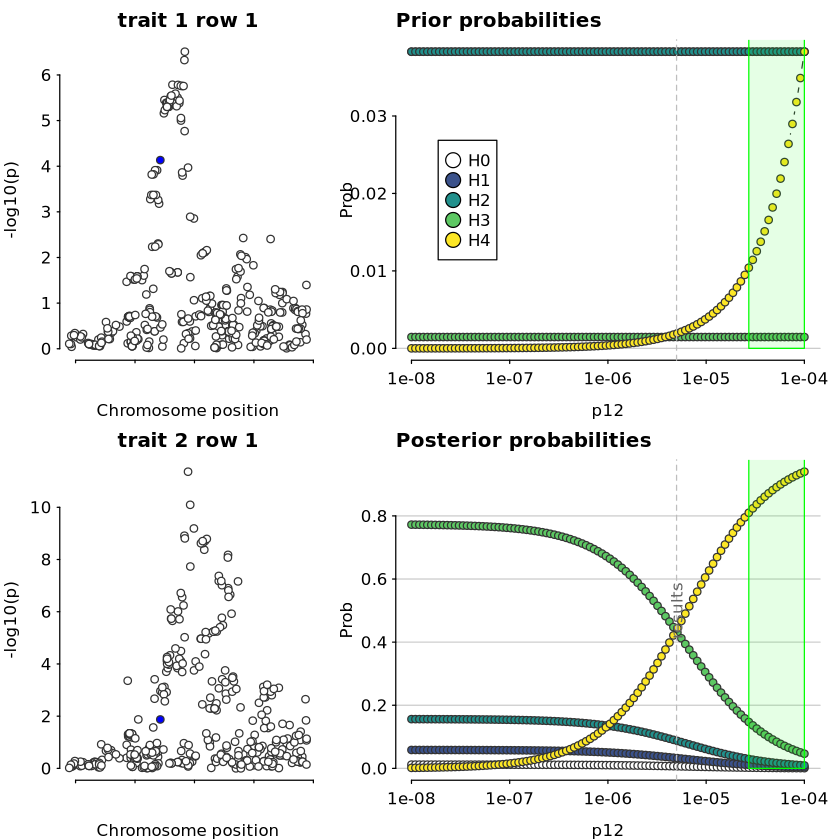

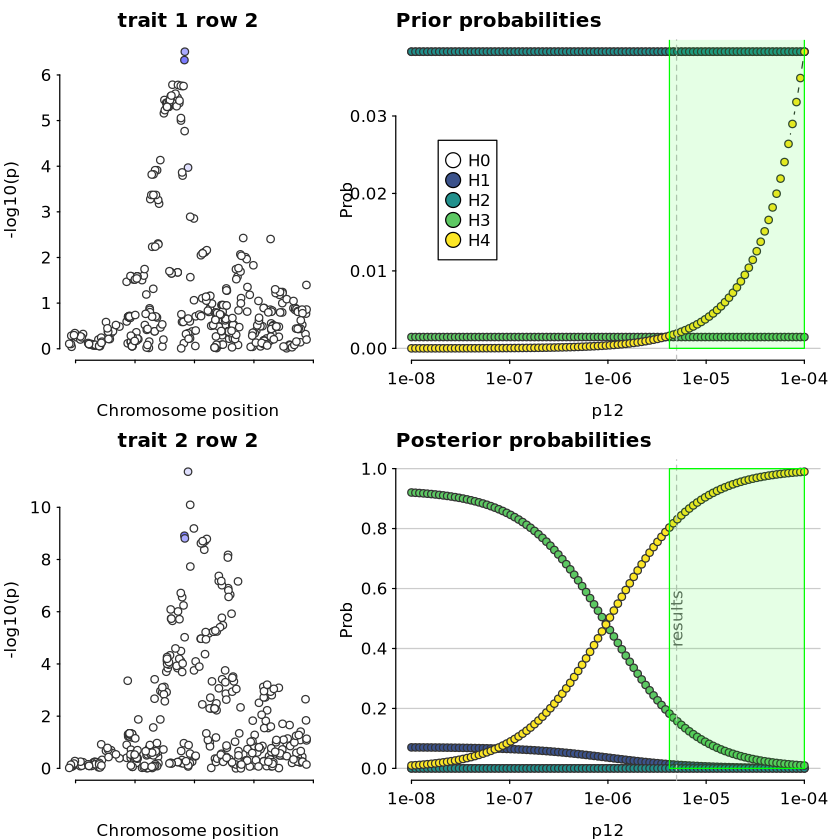

In [140]:

sensitivity(susie.res,"H4 > 0.8",row=1,dataset1=D1,dataset2=D2)
sensitivity(susie.res,"H4 > 0.8",row=2,dataset1=D1,dataset2=D2)



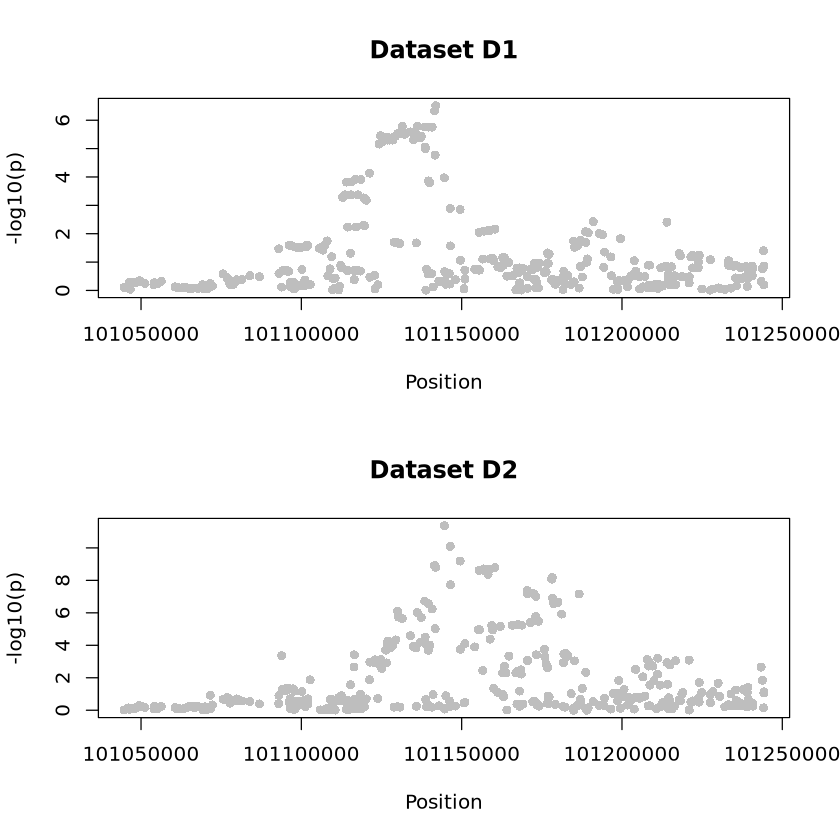

In [134]:
par(mfrow=c(2,1))
plot_dataset(D1, main="Dataset D1")
plot_dataset(D2, main="Dataset D2")